In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad('/home/icb/jonas.flor/gastrulation_atlas/data/gastrulation_IDs.h5ad', backed='r')
adata

AnnData object with n_obs × n_vars = 89267 × 47759 backed at '/home/icb/jonas.flor/gastrulation_atlas/data/gastrulation_IDs.h5ad'
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom', 'dpt_pseudotime'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'celltype_colors', 'diffmap_evals', 'iroot', 'neighbors'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1226: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


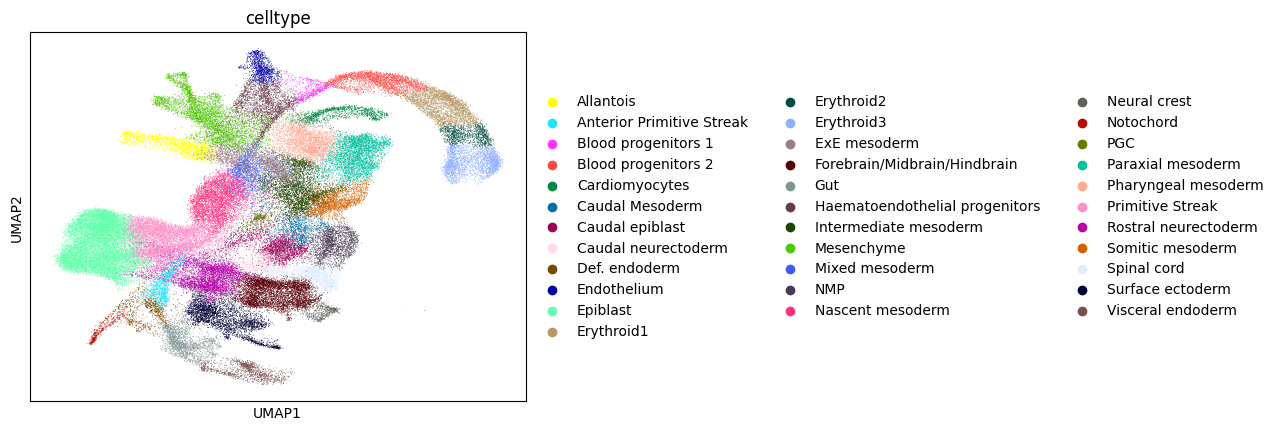

In [3]:
sc.pl.umap(adata, color='celltype')

In [4]:
sc.pp.neighbors(adata)

/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
adata.uns['iroot'] = adata.obs.index.get_loc(
    adata[(adata.obs.stage == 'E6.5') & (adata.obs.celltype == 'Primitive Streak')]
    .obs.first_valid_index()
)

In [7]:
sc.tl.dpt(adata)

In [8]:
adata.write('/home/icb/jonas.flor/gastrulation_atlas/data/gastrulation_IDs.h5ad')

In [6]:
adata = sc.read_h5ad('/home/icb/jonas.flor/gastrulation_atlas/data/gastrulation_IDs.h5ad')
adata.obs['day'] = [float(x[1:]) for x in adata.obs['stage']]
adata.obs.day.unique()

array([6.5 , 7.5 , 6.75, 7.75, 7.  , 8.  , 8.5 , 7.25, 8.25])

In [8]:
adata.write('/home/icb/jonas.flor/gastrulation_atlas/data/gastrulation_ds.h5ad')

In [10]:
adata.obsm['X_pca'].shape

(89267, 50)

In [12]:
adata.obs['batch'] = adata.obs['sequencing.batch']

In [13]:
adata.write('/home/icb/jonas.flor/gastrulation_atlas/data/gastrulation_ds.h5ad')

In [2]:
adata = sc.read_h5ad('/home/icb/jonas.flor/gastrulation_atlas/data/gastrulation_ds.h5ad')
adata.obs.day.unique()

array([6.5 , 7.5 , 6.75, 7.75, 7.  , 8.  , 8.5 , 7.25, 8.25])

In [5]:
adata.obs.stage.unique()

['E6.5', 'E7.5', 'E6.75', 'E7.75', 'E7.0', 'E8.0', 'E8.5', 'E7.25', 'E8.25']
Categories (9, object): ['E6.5', 'E6.75', 'E7.0', 'E7.25', ..., 'E7.75', 'E8.0', 'E8.25', 'E8.5']

In [18]:
adata.obs.day = adata.obs.stage

In [25]:
adata.write('/home/icb/jonas.flor/gastrulation_atlas/data/gastrulation_ds.h5ad')

In [15]:
adata.obs.batch = [str(x) for x in adata.obs.batch]

In [3]:
tmp = sc.read_h5ad(f'/lustre/groups/ml01/workspace/monge_velo/data/mouse_gastrulation_atlas/training/adata_10k.h5ad', backed='r')
tmp

AnnData object with n_obs × n_vars = 10000 × 24552 backed at '/lustre/groups/ml01/workspace/monge_velo/data/mouse_gastrulation_atlas/training/adata_10k.h5ad'
    obs: 'cell_id', 'keep', 'day', 'embryo_id', 'experimental_batch', 'batch', 'cell_cluster', 'celltype', 'cellcluster_moscot'
    var: 'gene_type', 'celltype', 'chr'
    uns: 'neighbors'
    obsm: 'X_pca'
    obsp: 'connectivities', 'distances'

In [17]:
tmp.obs.day.unique()

['E11.75', 'P0', 'E12.25', 'E10.0', 'E18.5', ..., 'E12.0', 'E18.25', 'E13.75', 'E16.0', 'E8.75']
Length: 43
Categories (43, object): ['E8.5', 'E8.75', 'E9.0', 'E9.5', ..., 'E18.5', 'E18.25', 'E18.75', 'P0']

In [24]:
adata

AnnData object with n_obs × n_vars = 89267 × 47759
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom', 'dpt_pseudotime', 'day', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'celltype_colors', 'diffmap_evals', 'iroot', 'neighbors', 'batch_colors', 'day_colors'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1226: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


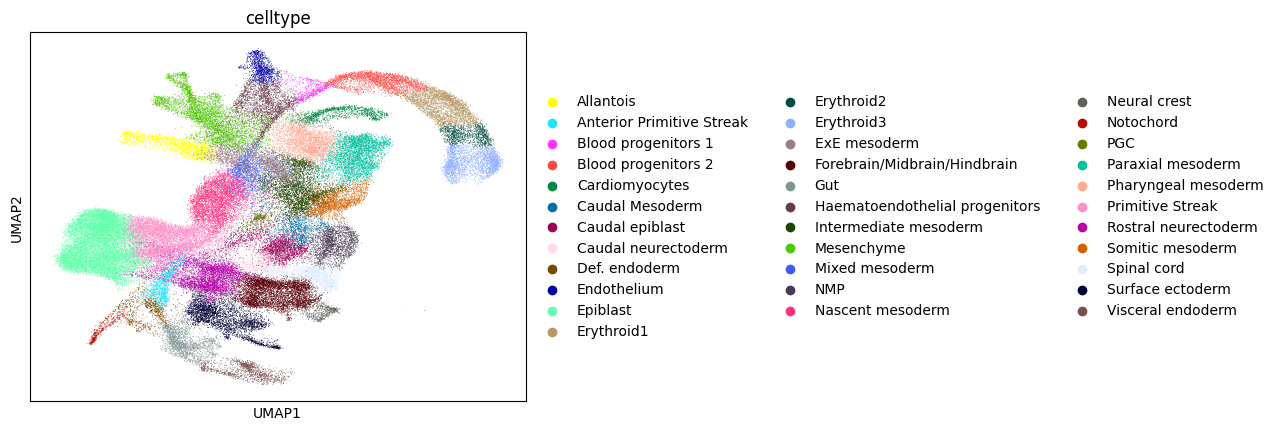

In [21]:
sc.pl.umap(adata, color='celltype')

/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1226: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


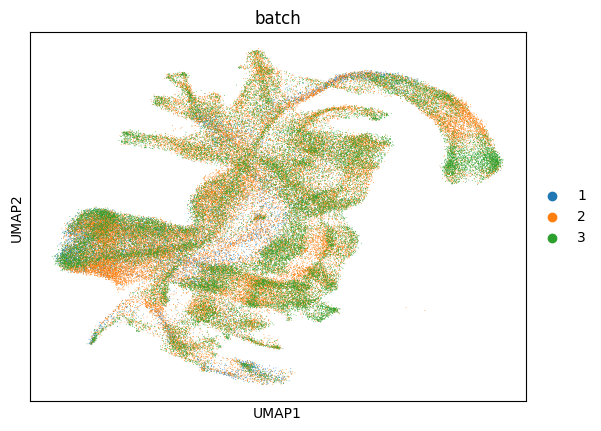

In [22]:
sc.pl.umap(adata, color='batch')

/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1226: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/jonas.flor/mambaforge/envs/subsampling/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


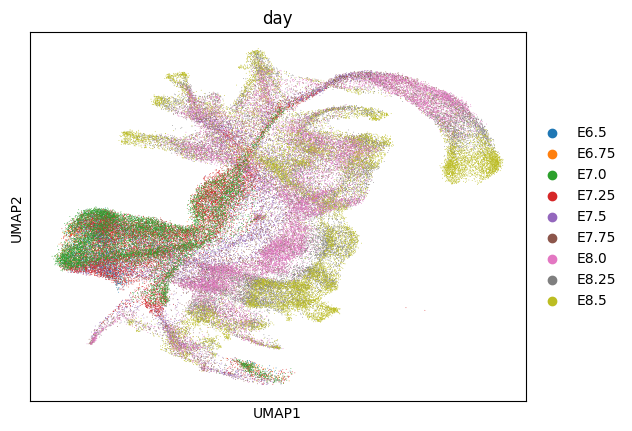

In [23]:
sc.pl.umap(adata, color='day')